In [92]:
import pandas as pd
import seaborn as sbn
import numpy as np

In [93]:
data = pd.read_csv(r"C:\python\pythonPtixiaki\database01.csv")

In [94]:
data.head()

,Artist,Song,Genre,Language,Lyrics
0,12 stones,world so cold,Rock,en,"It starts with pain, followed by hate\nFueled ..."
1,12 stones,broken,Rock,en,Freedom!\nAlone again again alone\nPatiently w...
2,12 stones,3 leaf loser,Rock,en,"Biting the hand that feeds you, lying to the v..."
3,12 stones,anthem for the underdog,Rock,en,You say you know just who I am\nBut you can't ...
4,12 stones,adrenaline,Rock,en,My heart is beating faster can't control these...


In [95]:
data = data.drop_duplicates(subset=['Artist', 'Song']).dropna(subset=['Lyrics'])


In [96]:
data

,Artist,Song,Genre,Language,Lyrics
0,12 stones,world so cold,Rock,en,"It starts with pain, followed by hate\nFueled ..."
1,12 stones,broken,Rock,en,Freedom!\nAlone again again alone\nPatiently w...
2,12 stones,3 leaf loser,Rock,en,"Biting the hand that feeds you, lying to the v..."
3,12 stones,anthem for the underdog,Rock,en,You say you know just who I am\nBut you can't ...
4,12 stones,adrenaline,Rock,en,My heart is beating faster can't control these...
...,...,...,...,...,...
290176,the blood brothers,beautiful horses,Indie,en,Ride! Ride! Ride! Ride! Ride! Ride! Ride the c...
290178,bobby womack,i wish he didn t trust me so much,R&B,en,I'm the best friend he's got I'd give him the ...
290179,bad boys blue,i totally miss you,Pop,en,"Bad Boys Blue ""I Totally Miss You"" I did you w..."
290181,dan bern,cure for aids,Indie,en,The day they found a cure for AIDS The day the...


In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 241978 entries, 0 to 290182
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   Artist    241978 non-null  object
 1   Song      241977 non-null  object
 2   Genre     241978 non-null  object
 3   Language  241974 non-null  object
 4   Lyrics    241978 non-null  object
dtypes: object(5)
memory usage: 11.1+ MB


In [98]:
data.describe(include='all')

,Artist,Song,Genre,Language,Lyrics
count,241978,241977,241978,241974,241978
unique,11152,164327,10,33,230259
top,elvis presley,intro,Rock,en,Instrumental
freq,1028,141,100664,209955,500


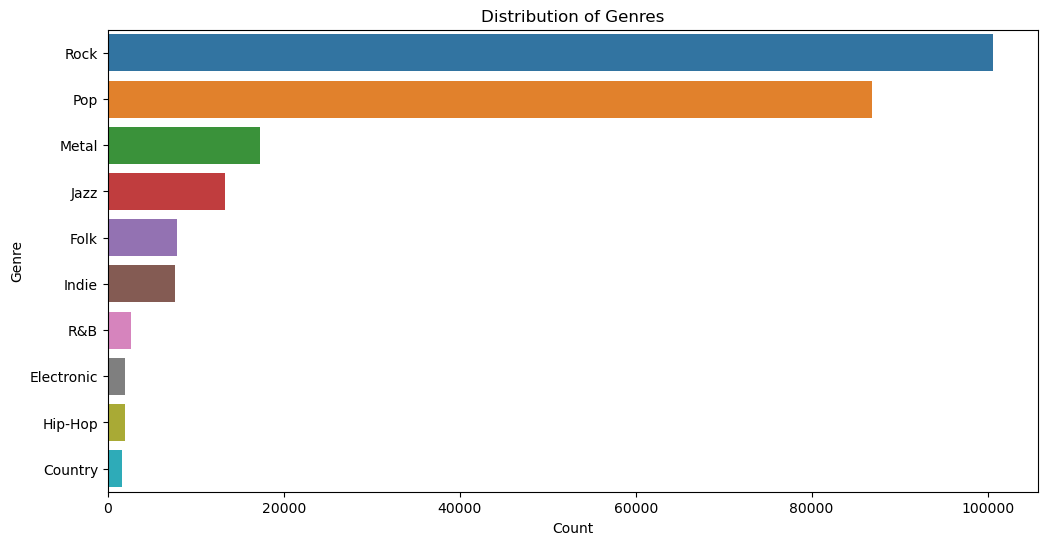

In [99]:
import matplotlib.pyplot as plt

# Plot the distribution of genres
plt.figure(figsize=(12, 6))
sbn.countplot(y=data['Genre'], order=data['Genre'].value_counts().index)
plt.title('Distribution of Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

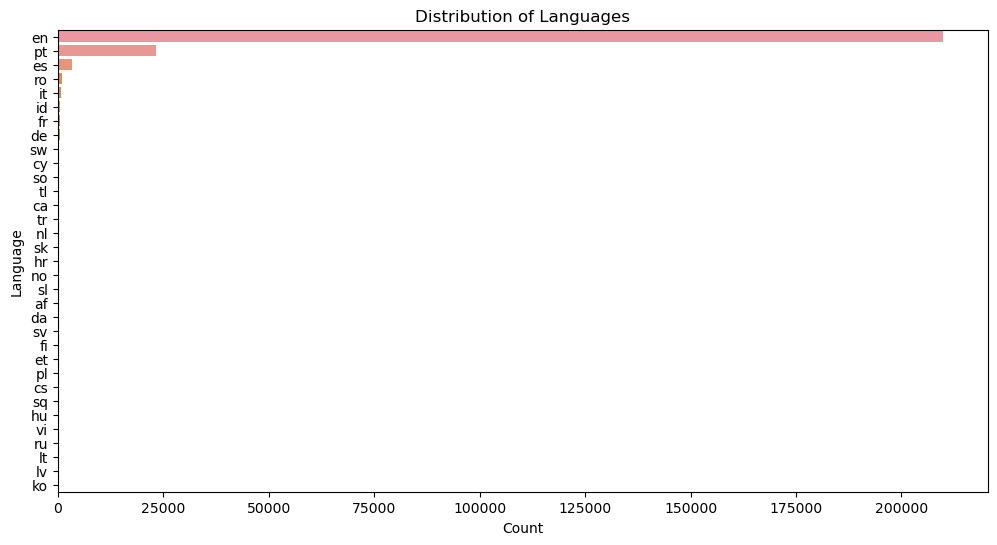

In [100]:
# Plot the distribution of languages
plt.figure(figsize=(12, 6))
sbn.countplot(y=data['Language'], order=data['Language'].value_counts().index)
plt.title('Distribution of Languages')
plt.xlabel('Count')
plt.ylabel('Language')
plt.show()


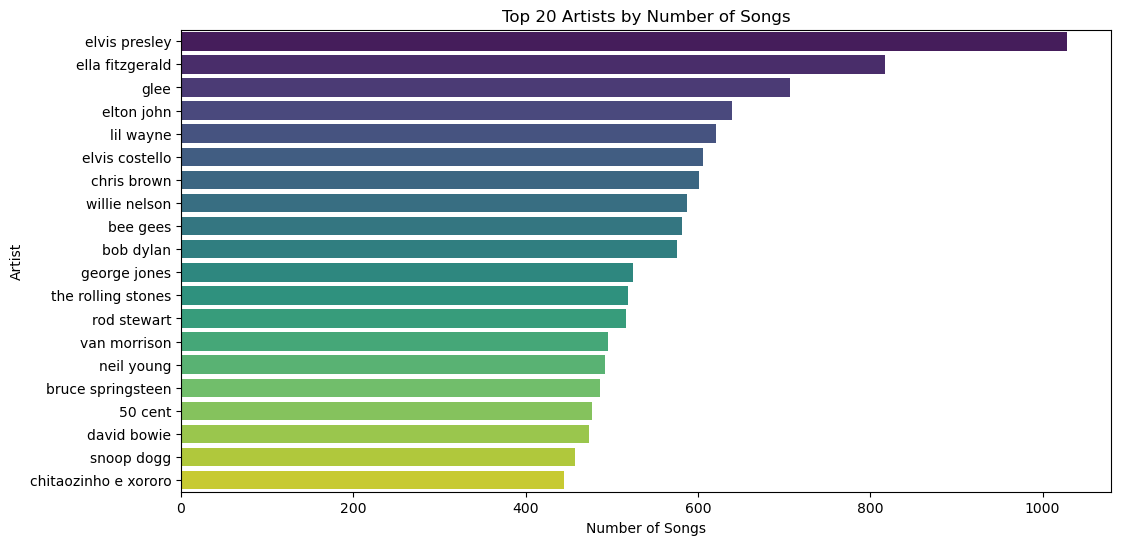

In [101]:
# Plot the top 20 artists by song count
top_artists = data['Artist'].value_counts().head(20)

plt.figure(figsize=(12, 6))
sbn.barplot(x=top_artists.values, y=top_artists.index, palette='viridis')
plt.title('Top 20 Artists by Number of Songs')
plt.xlabel('Number of Songs')
plt.ylabel('Artist')
plt.show()

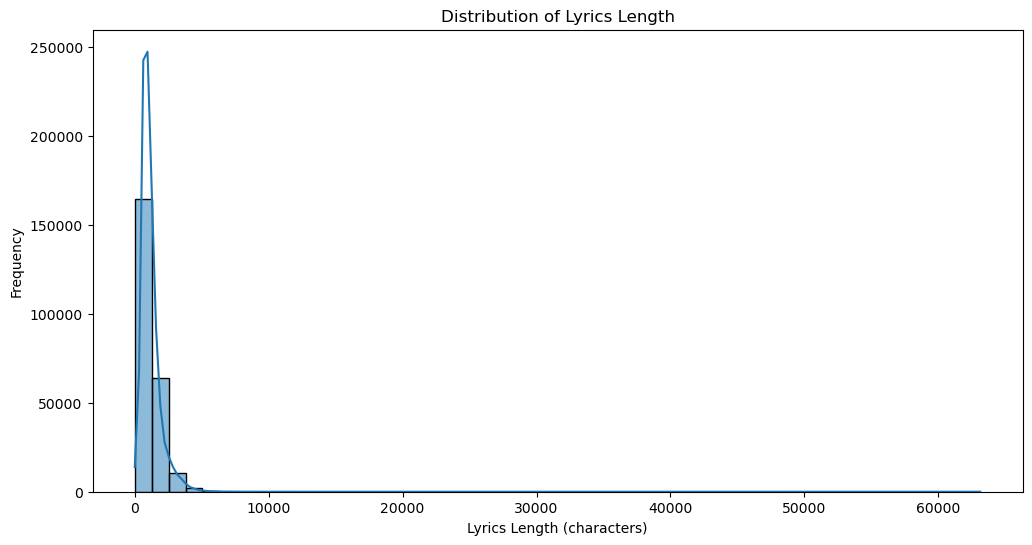

In [102]:
# Calculate the length of lyrics
data['Lyrics_Length'] = data['Lyrics'].apply(lambda x: len(str(x)) if pd.notnull(x) else 0)

# Plot the distribution of lyrics length
plt.figure(figsize=(12, 6))
sbn.histplot(data['Lyrics_Length'], bins=50, kde=True)
plt.title('Distribution of Lyrics Length')
plt.xlabel('Lyrics Length (characters)')
plt.ylabel('Frequency')
plt.show()


In [103]:
# Define the languages to keep
languages_to_keep = ['en', 'es', 'pt']

# Filter the dataset
filtered_data = data[data['Language'].isin(languages_to_keep)]

# Print the shape of the original and filtered datasets
print("Shape of original data:", data.shape)
print("Shape of filtered data:", filtered_data.shape)


Shape of original data: (241978, 6)
Shape of filtered data: (236609, 6)


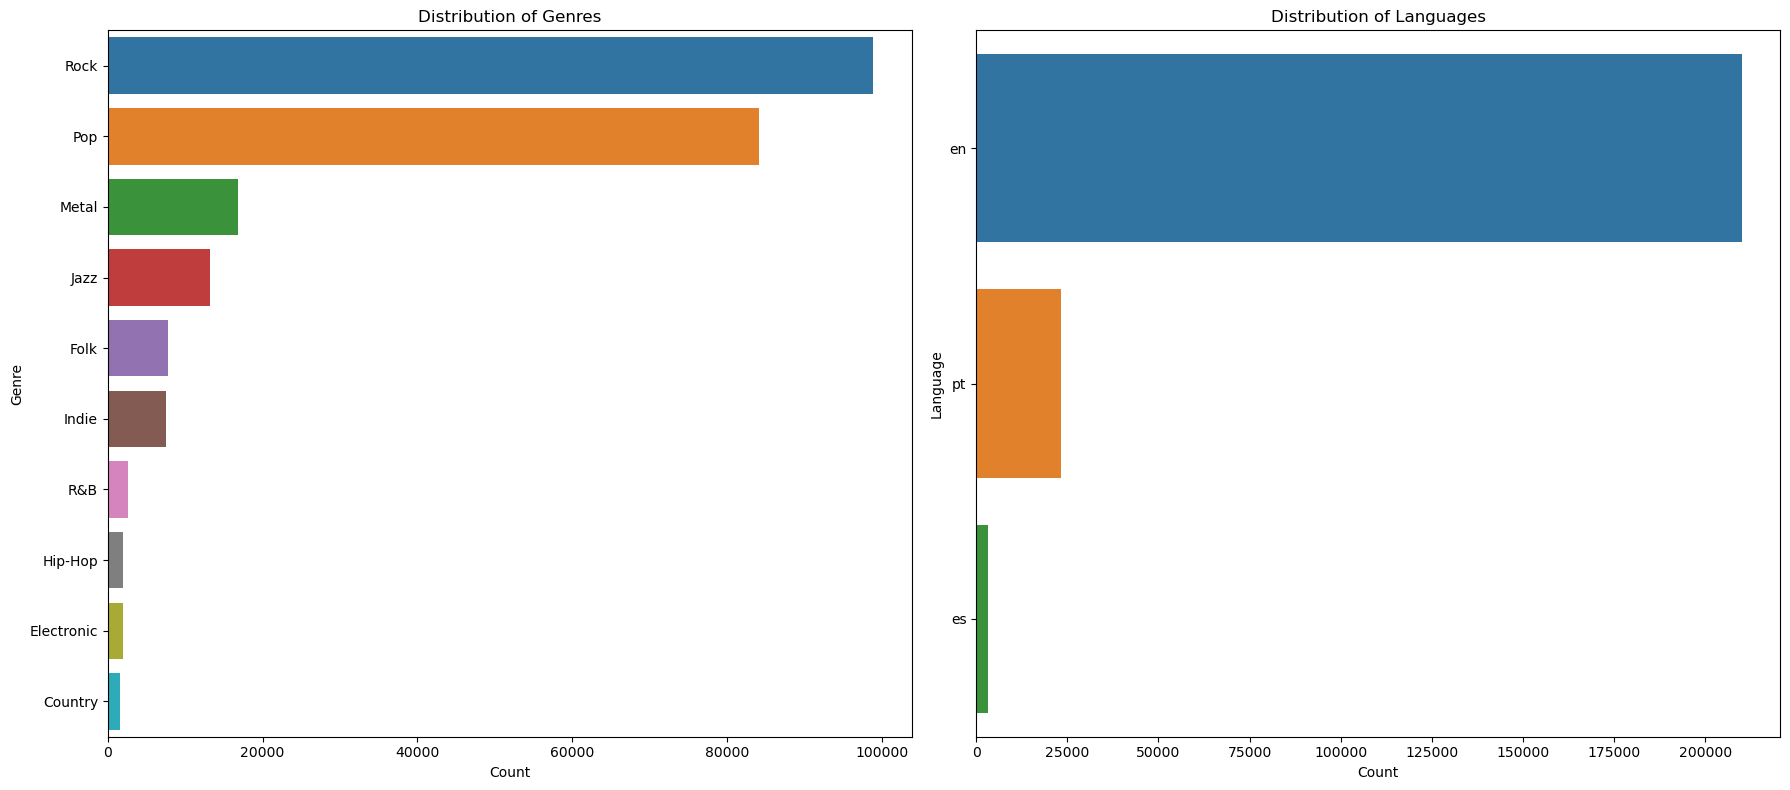

In [104]:
# Create subplots for genre distribution and language distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# Plot genre distribution
sbn.countplot(y=filtered_data['Genre'], order=filtered_data['Genre'].value_counts().index, ax=ax1)
ax1.set_title('Distribution of Genres')
ax1.set_xlabel('Count')
ax1.set_ylabel('Genre')

# Plot language distribution
sbn.countplot(y=filtered_data['Language'], order=filtered_data['Language'].value_counts().index, ax=ax2)
ax2.set_title('Distribution of Languages')
ax2.set_xlabel('Count')
ax2.set_ylabel('Language')

# Adjust layout
plt.tight_layout()
plt.show()


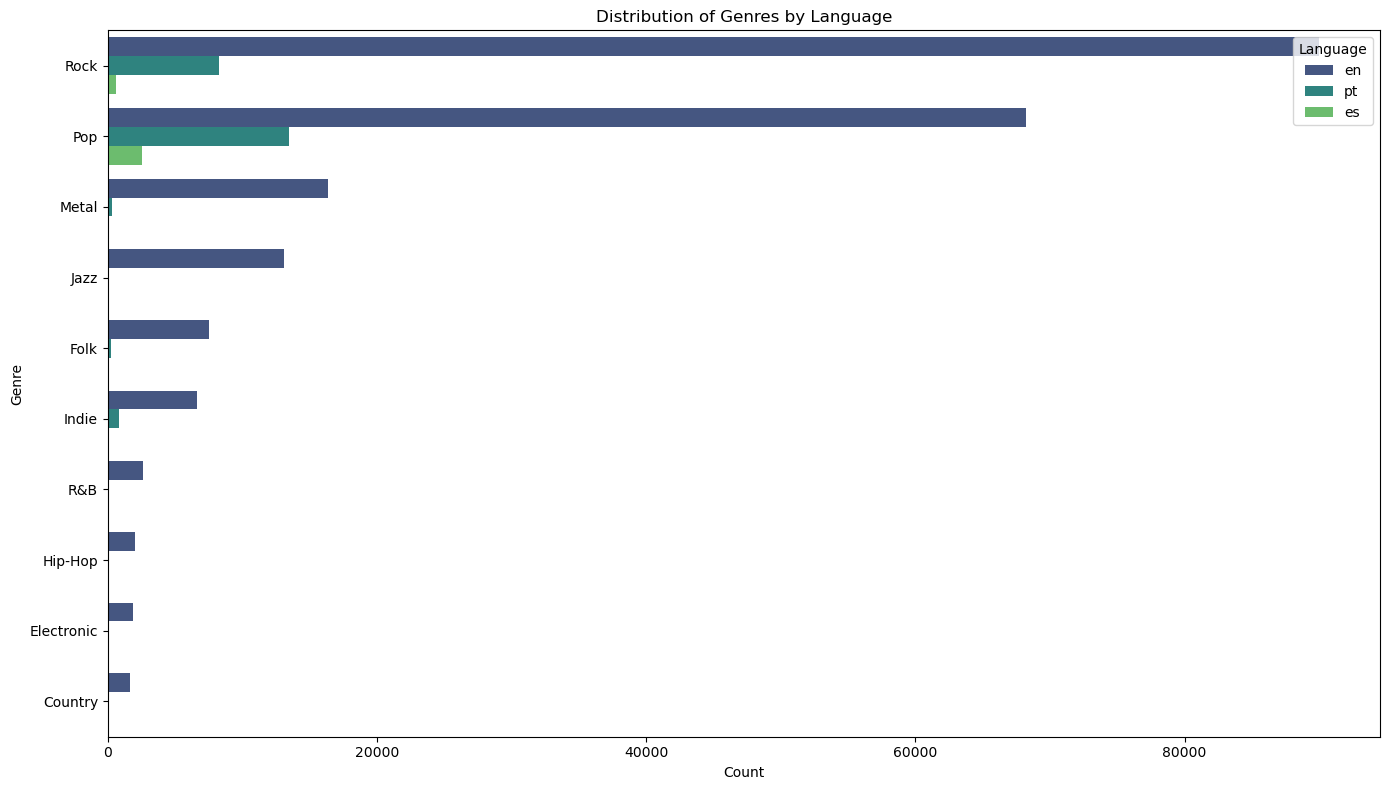

In [105]:
# Set up the plot
plt.figure(figsize=(14, 8))

# Plot combined distribution of genres and languages
sbn.countplot(y=filtered_data['Genre'], hue=filtered_data['Language'], order=filtered_data['Genre'].value_counts().index, palette='viridis')

# Add labels and title
plt.title('Distribution of Genres by Language')
plt.xlabel('Count')
plt.ylabel('Genre')

# Show the plot
plt.legend(title='Language', loc='upper right')
plt.tight_layout()
plt.show()

In [106]:
# Function to sample 200 songs per genre
def sample_songs(data, sample_size=500):
    sampled_data = data.groupby('Genre').apply(lambda x: x.sample(n=sample_size, random_state=42)).reset_index(drop=True)
    return sampled_data

# Sample the data
sampled_data = sample_songs(filtered_data)

# Verify the sample
sampled_data['Genre'].value_counts()

Genre
Country       500
Electronic    500
Folk          500
Hip-Hop       500
Indie         500
Jazz          500
Metal         500
Pop           500
R&B           500
Rock          500
Name: count, dtype: int64

In [107]:
sampled_data.to_csv("C:\python\pythonPtixiaki\sampleddata.csv")

In [108]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import defaultdict
import matplotlib.pyplot as plt
import nltk

# Ensure you have the necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vforv\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vforv\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [87]:
# Function to clean and tokenize lyrics
def tokenize_lyrics(lyrics):
    lyrics = lyrics.lower()
    tokens = word_tokenize(lyrics)
    tokens = [word for word in tokens if word.isalnum()]
    return tokens

# Remove stopwords and punctuation from NLTK
stop_words = set(stopwords.words('english') + stopwords.words('spanish') + stopwords.words('portuguese'))

# Function to find genre-specific unique words
def find_genre_specific_words(data):
    genre_word_sets = defaultdict(set)
    word_genre_map = defaultdict(set)
    
    # Iterate over each genre
    for genre in data['Genre'].unique():
        genre_data = data[data['Genre'] == genre]
        lyrics = genre_data['Lyrics'].dropna().str.cat(sep=' ')
        
        # Tokenize and clean lyrics
        tokens = tokenize_lyrics(lyrics)
        
        # Remove stopwords
        tokens = [token for token in tokens if token not in stop_words]
        
        # Add tokens to genre_word_sets and update word_genre_map
        for token in tokens:
            genre_word_sets[genre].add(token)
            word_genre_map[token].add(genre)
    
    # Identify unique words for each genre
    genre_specific_words = {genre: set() for genre in genre_word_sets}
    for word, genres in word_genre_map.items():
        if len(genres) == 1:
            genre = next(iter(genres))
            genre_specific_words[genre].add(word)
    
    return genre_specific_words

# Find genre-specific words in the sampled dataset
genre_specific_words = find_genre_specific_words(sampled_data)

# Count the number of genre-specific words per genre
genre_specific_word_counts = {genre: len(words) for genre, words in genre_specific_words.items()}

# Print the results
for genre, count in genre_specific_word_counts.items():
    print(f"Genre '{genre}' has {count} genre-specific words.")


Genre 'Country' has 728 genre-specific words.
Genre 'Electronic' has 2146 genre-specific words.
Genre 'Folk' has 1740 genre-specific words.
Genre 'Hip-Hop' has 5688 genre-specific words.
Genre 'Indie' has 1624 genre-specific words.
Genre 'Jazz' has 710 genre-specific words.
Genre 'Metal' has 1499 genre-specific words.
Genre 'Pop' has 2628 genre-specific words.
Genre 'R&B' has 700 genre-specific words.
Genre 'Rock' has 1437 genre-specific words.


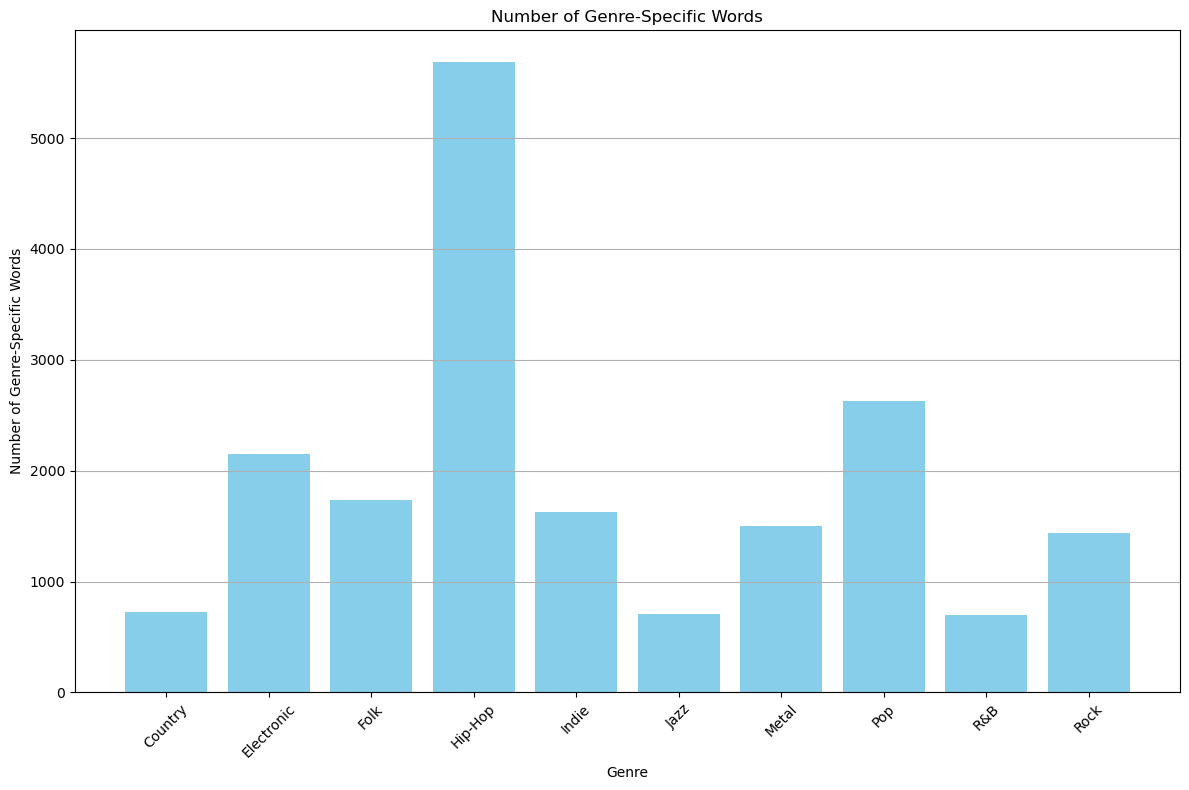

In [109]:
# Plotting
plt.figure(figsize=(12, 8))
plt.bar(genre_specific_word_counts.keys(), genre_specific_word_counts.values(), color='skyblue')
plt.title('Number of Genre-Specific Words')
plt.xlabel('Genre')
plt.ylabel('Number of Genre-Specific Words')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.tight_layout()
plt.show()


In [110]:
desired_genres = ['Hip-Hop','Jazz','Metal']


In [111]:
data= sampled_data[sampled_data["Genre"].isin(desired_genres)]
data.to_csv(r"C:\python\pythonPtixiaki\last_data.csv")

In [112]:
# Keep only the columns 'Genre' and 'Lyrics'
data = data[['Genre', 'Lyrics']]

# Save the filtered data to a new CSV file (optional)
data.to_csv(r"C:\python\pythonPtixiaki\final_data.csv", index=False)

# Display the first few rows to confirm the changes
print(data.head())


        Genre                                             Lyrics
1500  Hip-Hop  Jus' look at them I tell you, it warms the hea...
1501  Hip-Hop  Union Jack and Union Jill Back up and down the...
1502  Hip-Hop  I'm sorry, but I don't want to be an emperor T...
1503  Hip-Hop  In the studio I read a magazine They had a col...
1504  Hip-Hop  Let me get to the point real quick When ya poc...


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


# Encode genres
label_encoder = LabelEncoder()
sampled_data['GenreEncoded'] = label_encoder.fit_transform(sampled_data['Genre'])

# Split the data into training and testing sets
train_data, test_data = train_test_split(sampled_data, test_size=0.2, random_state=42, stratify=sampled_data['GenreEncoded'])

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from transformers import BertTokenizer, BertForSequenceClassification, AdamW, get_linear_schedule_with_warmup
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
from tqdm import tqdm
import numpy as np

sampled_data = data

# Encode genres
label_encoder = LabelEncoder()
sampled_data['GenreEncoded'] = label_encoder.fit_transform(sampled_data['Genre'])

# Split the data into training and testing sets
train_data, test_data = train_test_split(sampled_data, test_size=0.2, random_state=42, stratify=sampled_data['GenreEncoded'])

class LyricsDataset(Dataset):
    def __init__(self, data, tokenizer, max_length):
        self.lyrics = data['Lyrics'].tolist()
        self.labels = data['GenreEncoded'].tolist()
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.lyrics)

    def __getitem__(self, idx):
        lyrics = str(self.lyrics[idx])
        label = self.labels[idx]
        
        encoding = self.tokenizer.encode_plus(
            lyrics,
            add_special_tokens=True,
            max_length=self.max_length,
            return_token_type_ids=False,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt'
        )
        
        return {
            'lyrics_text': lyrics,
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }

PRE_TRAINED_MODEL_NAME = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(PRE_TRAINED_MODEL_NAME)
MAX_LEN = 512
BATCH_SIZE = 64

train_dataset = LyricsDataset(train_data, tokenizer, MAX_LEN)
test_dataset = LyricsDataset(test_data, tokenizer, MAX_LEN)

train_data_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_data_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

model = BertForSequenceClassification.from_pretrained(PRE_TRAINED_MODEL_NAME, num_labels=len(label_encoder.classes_))
optimizer = AdamW(model.parameters(), lr=2e-5, correct_bias=False)
total_steps = len(train_data_loader) * 3  # 3 epochs
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=total_steps)
loss_fn = nn.CrossEntropyLoss().to('cuda')
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

def train_epoch(model, data_loader, loss_fn, optimizer, device, scheduler, n_examples):
    model.train()
    losses = []
    correct_predictions = 0

    for d in tqdm(data_loader, desc="Training"):
        input_ids = d["input_ids"].to(device)
        attention_mask = d["attention_mask"].to(device)
        labels = d["labels"].to(device)

        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        logits = outputs.logits

        _, preds = torch.max(logits, dim=1)
        correct_predictions += torch.sum(preds == labels)
        losses.append(loss.item())

        loss.backward()
        optimizer.step()
        scheduler.step()
        optimizer.zero_grad()

    return correct_predictions.double() / n_examples, np.mean(losses)

def eval_model(model, data_loader, loss_fn, device, n_examples):
    model.eval()
    losses = []
    correct_predictions = 0

    with torch.no_grad():
        for d in tqdm(data_loader, desc="Evaluating"):
            input_ids = d["input_ids"].to(device)
            attention_mask = d["attention_mask"].to(device)
            labels = d["labels"].to(device)

            outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            logits = outputs.logits

            _, preds = torch.max(logits, dim=1)
            correct_predictions += torch.sum(preds == labels)
            losses.append(loss.item())

    return correct_predictions.double() / n_examples, np.mean(losses)

EPOCHS = 3

for epoch in range(EPOCHS):
    print(f'Epoch {epoch + 1}/{EPOCHS}')
    print('-' * 10)
    
    train_acc, train_loss = train_epoch(model, train_data_loader, loss_fn, optimizer, device, scheduler, len(train_data))
    print(f'Train loss {train_loss} accuracy {train_acc}')
    
    val_acc, val_loss = eval_model(model, test_data_loader, loss_fn, device, len(test_data))
    print(f'Val loss {val_loss} accuracy {val_acc}')
    print()

test_acc, test_loss = eval_model(model, test_data_loader, loss_fn, device, len(test_data))
print(f'Test loss {test_loss} accuracy {test_acc}')
        
